In [25]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
import matplotlib.pyplot as plt
import tensorflow as tf

# make a plot outputs appear and be stored within the notebook
%matplotlib inline

print("Complete")

Complete


In [43]:
LETTER_NAMES = {
    1: "alif",
    10: "ra",
    11: "zay",
    12: "sin",
    13: "shin",
    14: "sad",
    15: "dad",
    16: "da",
    17: "za",
    18: "ayn",
    19: "gayn",
    2: "ba",
    20: "fa",
    21: "qaf",
    22: "kaf",
    23: "lam",
    24: "mim",
    25: "non",
    26: "ha",
    27: "waw",
    28: "ya",
    29: "hamza",
    3: "ta",
    4: "tha",
    5: "gim",
    6: "ha",
    7: "kha",
    8: "dal",
    9: "thal"
}

In [26]:
x_train = pd.read_csv("./X_train.csv")
y_train = pd.read_csv("./y_train.csv")

In [27]:
print(x_train.columns)
print(y_train.columns)
assert len(x_train) == len(y_train)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel1014', 'pixel1015', 'pixel1016', 'pixel1017', 'pixel1018',
       'pixel1019', 'pixel1020', 'pixel1021', 'pixel1022', 'pixel1023'],
      dtype='object', length=1024)
Index(['label'], dtype='object')


In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37933 entries, 0 to 37932
Columns: 1024 entries, pixel0 to pixel1023
dtypes: int64(1024)
memory usage: 296.4 MB


In [29]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37933 entries, 0 to 37932
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   37933 non-null  int64
dtypes: int64(1)
memory usage: 296.5 KB


### Distributions

<AxesSubplot:>

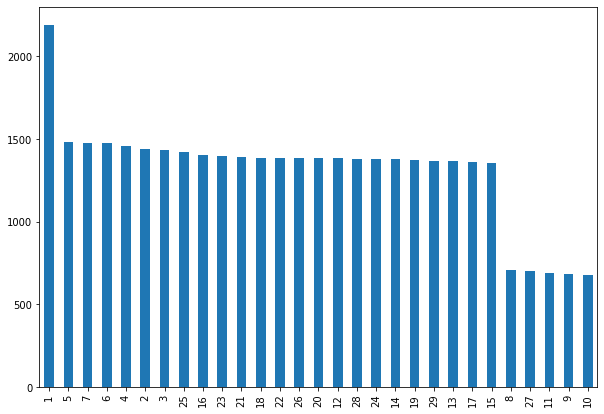

In [30]:
plt.figure(figsize=(10,7))
y_train['label'].value_counts().plot(kind="bar")

In [31]:
max([x_train[column].max() for column in x_train.columns] )

255

So each pixel takes value 0-255

### Checking pc config

In [32]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### Changing data format to compatible with tf training

In [33]:
x_train_tf = tf.convert_to_tensor(x_train)
x_train_tf = x_train_tf / 255 # normalisation from 0 - 255 to 0 - 1
x_train_tf

<tf.Tensor: shape=(37933, 1024), dtype=float64, numpy=
array([[0.        , 0.        , 0.        , ..., 0.        , 0.01568627,
        0.02352941],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01176471, 0.04313725, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])>

### TF model

In [60]:
y_train_tf = y_train - 1
y_train_tf

,label
0,0
1,0
2,0
3,0
4,0
...,...
37928,28
37929,28
37930,28
37931,28


In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=1024),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(29, activation='relu')
])

model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

##### Accuracy at which model stops learning
128,20,20 ~ 0.6\
100,100,40 ~0.49\
256,28,29 ~0.65\
256,50,10 ~0.71\
256,50,50,10 ~0.65

In [73]:
model.fit(x_train_tf, y_train_tf, epochs=30)


Epoch 1/30
1186/1186 [==============================] - 8s 6ms/step - loss: 3.1310 - accuracy: 0.1278
Epoch 2/30
1186/1186 [==============================] - 8s 7ms/step - loss: 2.6982 - accuracy: 0.2614
Epoch 3/30
1186/1186 [==============================] - 8s 6ms/step - loss: 2.4409 - accuracy: 0.3331
Epoch 4/30
1186/1186 [==============================] - 8s 7ms/step - loss: 2.2498 - accuracy: 0.3881
Epoch 5/30
1186/1186 [==============================] - 7s 6ms/step - loss: 2.1040 - accuracy: 0.4299
Epoch 6/30
1186/1186 [==============================] - 7s 6ms/step - loss: 1.9800 - accuracy: 0.4639
Epoch 7/30
1186/1186 [==============================] - 7s 6ms/step - loss: 1.8733 - accuracy: 0.4967
Epoch 8/30
1186/1186 [==============================] - 7s 6ms/step - loss: 1.7849 - accuracy: 0.5188
Epoch 9/30
1186/1186 [==============================] - 7s 6ms/step - loss: 1.7093 - accuracy: 0.5384
Epoch 10/30
1186/1186 [==============================] - 5s 4ms/step - loss: 1.643